# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Author: Kaleb Nunn

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline
load_dotenv()

True

In [2]:
# Read your api key environment variable
api_key = os.getenv('NEWS_API_KEY')

In [3]:
# Create a newsapi client
na = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_headlines = na.get_everything(q="bitcoin", language="en")
btc_headlines

{'status': 'ok',
 'totalResults': 8941,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'Jon Fingas',
   'title': 'Tesla buys $1.5 in Bitcoin, will soon accept it as payment',
   'description': 'Elon Musk’s cryptocurrency hype was more than just idle talk. CNBC reports that Tesla not only bought $1.5 billion worth of Bitcoin to help “diversify and maximize” its returns, but will start taking payments using the digital asset sometime in the “near futu…',
   'url': 'https://www.engadget.com/tesla-to-take-bitcoin-payments-140109988.html',
   'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-02/389f89e0-6a11-11eb-b5c5-309f2241e56a',
   'publishedAt': '2021-02-08T14:01:09Z',
   'content': 'Elon Musks cryptocurrency hype was more than just idle talk. CNBCreports that Tesla not only bought $1.5 billion worth of Bitcoin to help diversify and maximize its returns, but will start taking pay… [+1182 chars]'},
  {'source': {'id': 'the-verge', 'name': 'T

In [5]:
# Fetch the Ethereum news articles
eth_headlines = na.get_everything(q="ethereum", language="en")
eth_headlines

{'status': 'ok',
 'totalResults': 1812,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'Jon Fingas',
   'title': 'NVIDIA limits RTX 3060 crypto speeds as it introduces mining cards',
   'description': "Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. The company has revealed that it's cutting the hash rate (mi…",
   'url': 'https://www.engadget.com/nvidia-limits-rtx-3060-for-crypto-mining-161657361.html',
   'urlToImage': 'https://s.yimg.com/uu/api/res/1.2/VLoRobjl1FcFEgV_0XjzqQ--~B/aD0xMDY3O3c9MTYwMDthcHBpZD15dGFjaHlvbg--/https://s.yimg.com/os/creatr-uploaded-images/2021-02/cad5ae60-7200-11eb-bbbc-25bd3507e406.cf.jpg',
   'publishedAt': '2021-02-18T16:16:57Z',
   'content': 'Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple 

In [6]:
text = [(str(article['title']) + str(article['content'])).split('…')[0] for article in btc_headlines['articles']]

In [7]:
btc_sentiments = []

for content in text:
    try:
        sentiment = analyzer.polarity_scores(content)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "text": content
            
        })    
    except AttributeError:
        pass
    
btc_df = pd.DataFrame(btc_sentiments)
btc_df.head()


,Compound,Positive,Negative,Neutral,text
0,0.3612,0.112,0.035,0.853,"Tesla buys $1.5 in Bitcoin, will soon accept i..."
1,0.3818,0.060,0.000,0.940,Tesla’s $1.5 billion bitcoin purchase clashes ...
2,-0.1027,0.000,0.036,0.964,Would You Trade a Bitcoin for a Tesla?For a br...
3,0.2500,0.045,0.000,0.955,Jack Dorsey and Jay Z invest $23.6 million to ...
4,0.7906,0.157,0.000,0.843,"Tesla buys $1.5B in bitcoin, may accept the cr..."


In [8]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []
btc_text = [(str(article['title']) + ' '+ str(article['content'])).split('…')[0] for article in btc_headlines['articles']]

for content in btc_text:
    try:
        sentiment = analyzer.polarity_scores(content)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "text": content
            
        })    
    except AttributeError:
        pass
    
btc_df = pd.DataFrame(btc_sentiments)
btc_df.head()

,Compound,Positive,Negative,Neutral,text
0,0.3612,0.109,0.034,0.857,"Tesla buys $1.5 in Bitcoin, will soon accept i..."
1,0.3818,0.058,0.000,0.942,Tesla’s $1.5 billion bitcoin purchase clashes ...
2,-0.1027,0.000,0.035,0.965,Would You Trade a Bitcoin for a Tesla? For a b...
3,0.2500,0.044,0.000,0.956,Jack Dorsey and Jay Z invest $23.6 million to ...
4,0.7906,0.154,0.000,0.846,"Tesla buys $1.5B in bitcoin, may accept the cr..."


In [9]:
# Create the ethereum sentiment scores DataFrame
eth_sentiments = []
eth_text = [(str(article['title']) + ' ' + str(article['content'])).split('…')[0] for article in eth_headlines['articles']]

for content in eth_text:
    try:
        sentiment = analyzer.polarity_scores(content)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "text": content
            
        })    
    except AttributeError:
        pass
    
eth_df = pd.DataFrame(eth_sentiments)
eth_df.head()

,Compound,Positive,Negative,Neutral,text
0,-0.3400,0.052,0.098,0.849,NVIDIA limits RTX 3060 crypto speeds as it int...
1,0.0000,0.000,0.000,1.000,Coinbase is going public via direct listing Co...
2,0.0000,0.000,0.000,1.000,Ethereum scales record peak before futures lau...
3,0.0000,0.000,0.000,1.000,Cryptocurrency Ethereum hits record high ahead...
4,0.0258,0.025,0.000,0.975,Remastered 'nyan cat' art sells for the equiva...


In [10]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.224045,0.100350,0.028000,0.871650
std,0.374047,0.122012,0.043214,0.127186
min,-0.788100,0.000000,0.000000,0.580000
25%,0.000000,0.024750,0.000000,0.842250
50%,0.213950,0.055500,0.000000,0.889000
75%,0.396450,0.124750,0.039000,0.961250
max,0.875000,0.420000,0.169000,1.000000


In [11]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.00000,20.000000,20.00000
mean,0.216445,0.06075,0.015200,0.92400
std,0.309749,0.05448,0.029646,0.06353
min,-0.340000,0.00000,0.000000,0.80300
25%,0.000000,0.00000,0.000000,0.87425
50%,0.172000,0.05950,0.000000,0.92650
75%,0.453775,0.10450,0.008750,1.00000
max,0.726900,0.19700,0.098000,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has the highest mean positive score.

Q: Which coin had the highest compound score?

A: Bitcoin has the highest compound score.

Q. Which coin had the highest positive score?

A: Bitcoin has the highest positive score.

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

lemmatizer = WordNetLemmatizer()

In [13]:
# Expand the default stopwords list if necessary
# nltk.download('stopwords')

In [14]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    sentence = regex.sub('', text)
    # Create a list of the words
    words = word_tokenize(sentence)
    # Remove the stop words and convert words to lowercase
    sw = set(stopwords.words('english'))
    stopped = [word.lower() for word in words if word.lower() not in sw]
    # Lemmatize Words into root words
    lemmatized = [lemmatizer.lemmatize(word) for word in stopped]
    return lemmatized


In [15]:
# Create a new tokens column for bitcoin
btc_df['tokens'] = btc_df['text'].apply(tokenizer)
btc_df.head()

,Compound,Positive,Negative,Neutral,text,tokens
0,0.3612,0.109,0.034,0.857,"Tesla buys $1.5 in Bitcoin, will soon accept i...","[tesla, buy, bitcoin, soon, accept, payment, e..."
1,0.3818,0.058,0.000,0.942,Tesla’s $1.5 billion bitcoin purchase clashes ...,"[tesla, billion, bitcoin, purchase, clash, env..."
2,-0.1027,0.000,0.035,0.965,Would You Trade a Bitcoin for a Tesla? For a b...,"[would, trade, bitcoin, tesla, brief, moment, ..."
3,0.2500,0.044,0.000,0.956,Jack Dorsey and Jay Z invest $23.6 million to ...,"[jack, dorsey, jay, z, invest, million, fund, ..."
4,0.7906,0.154,0.000,0.846,"Tesla buys $1.5B in bitcoin, may accept the cr...","[tesla, buy, b, bitcoin, may, accept, cryptocu..."


In [16]:
# Create a new tokens column for ethereum
eth_df['tokens'] = eth_df['text'].apply(tokenizer)
eth_df.head()

,Compound,Positive,Negative,Neutral,text,tokens
0,-0.3400,0.052,0.098,0.849,NVIDIA limits RTX 3060 crypto speeds as it int...,"[nvidia, limit, rtx, crypto, speed, introduces..."
1,0.0000,0.000,0.000,1.000,Coinbase is going public via direct listing Co...,"[coinbase, going, public, via, direct, listing..."
2,0.0000,0.000,0.000,1.000,Ethereum scales record peak before futures lau...,"[ethereum, scale, record, peak, future, launch..."
3,0.0000,0.000,0.000,1.000,Cryptocurrency Ethereum hits record high ahead...,"[cryptocurrency, ethereum, hit, record, high, ..."
4,0.0258,0.025,0.000,0.975,Remastered 'nyan cat' art sells for the equiva...,"[remastered, nyan, cat, art, sell, equivalent,..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
# Generate the Bitcoin N-grams where N=2
btc_all = ' '.join([' '.join(x) for x in btc_df['tokens']])
btc_bigram_counts = Counter(ngrams(btc_all.split(' '), n=2))
btc_bigram_counts

Counter({('tesla', 'buy'): 2,
         ('buy', 'bitcoin'): 1,
         ('bitcoin', 'soon'): 1,
         ('soon', 'accept'): 1,
         ('accept', 'payment'): 1,
         ('payment', 'elon'): 1,
         ('elon', 'musk'): 6,
         ('musk', 'cryptocurrency'): 1,
         ('cryptocurrency', 'hype'): 1,
         ('hype', 'idle'): 1,
         ('idle', 'talk'): 1,
         ('talk', 'cnbcreports'): 1,
         ('cnbcreports', 'tesla'): 1,
         ('tesla', 'bought'): 1,
         ('bought', 'billion'): 1,
         ('billion', 'worth'): 1,
         ('worth', 'bitcoin'): 1,
         ('bitcoin', 'help'): 1,
         ('help', 'diversify'): 1,
         ('diversify', 'maximize'): 1,
         ('maximize', 'return'): 1,
         ('return', 'start'): 1,
         ('start', 'taking'): 1,
         ('taking', 'pay'): 1,
         ('pay', 'tesla'): 1,
         ('tesla', 'billion'): 1,
         ('billion', 'bitcoin'): 4,
         ('bitcoin', 'purchase'): 1,
         ('purchase', 'clash'): 1,
         ('c

In [19]:
# Generate the Ethereum N-grams where N=2
eth_all = ' '.join([' '.join(x) for x in eth_df['tokens']])
eth_bigram_counts = Counter(ngrams(eth_all.split(' '), n=2))
eth_bigram_counts

Counter({('nvidia', 'limit'): 1,
         ('limit', 'rtx'): 1,
         ('rtx', 'crypto'): 1,
         ('crypto', 'speed'): 1,
         ('speed', 'introduces'): 1,
         ('introduces', 'mining'): 1,
         ('mining', 'card'): 1,
         ('card', 'worried'): 1,
         ('worried', 'geforce'): 1,
         ('geforce', 'rtx'): 1,
         ('rtx', 'sold'): 1,
         ('sold', 'cryptocurrency'): 1,
         ('cryptocurrency', 'miner'): 3,
         ('miner', 'snap'): 1,
         ('snap', 'every'): 1,
         ('every', 'gpu'): 1,
         ('gpu', 'sight'): 1,
         ('sight', 'nvidia'): 1,
         ('nvidia', 'think'): 1,
         ('think', 'simple'): 1,
         ('simple', 'way'): 1,
         ('way', 'help'): 1,
         ('help', 'make'): 1,
         ('make', 'new'): 1,
         ('new', 'card'): 1,
         ('card', 'unattractive'): 1,
         ('unattractive', 'crypto'): 1,
         ('crypto', 'crowd'): 1,
         ('crowd', 'coinbase'): 1,
         ('coinbase', 'going'): 1,
     

In [20]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Get the top 10 words for Bitcoin
top_btc = token_count(btc_all.split(' '))
top_btc

[('bitcoin', 28),
 ('tesla', 12),
 ('cryptocurrency', 10),
 ('musk', 7),
 ('elon', 6),
 ('billion', 5),
 ('dorsey', 5),
 ('company', 5),
 ('buy', 4),
 ('future', 4)]

In [22]:
# Get the top 10 words for Ethereum
top_eth = token_count(eth_all.split(' '))
top_eth

[('reuters', 30),
 ('ethereum', 20),
 ('bitcoin', 14),
 ('cryptocurrency', 11),
 ('high', 11),
 ('record', 10),
 ('hit', 9),
 ('week', 9),
 ('future', 7),
 ('new', 6)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

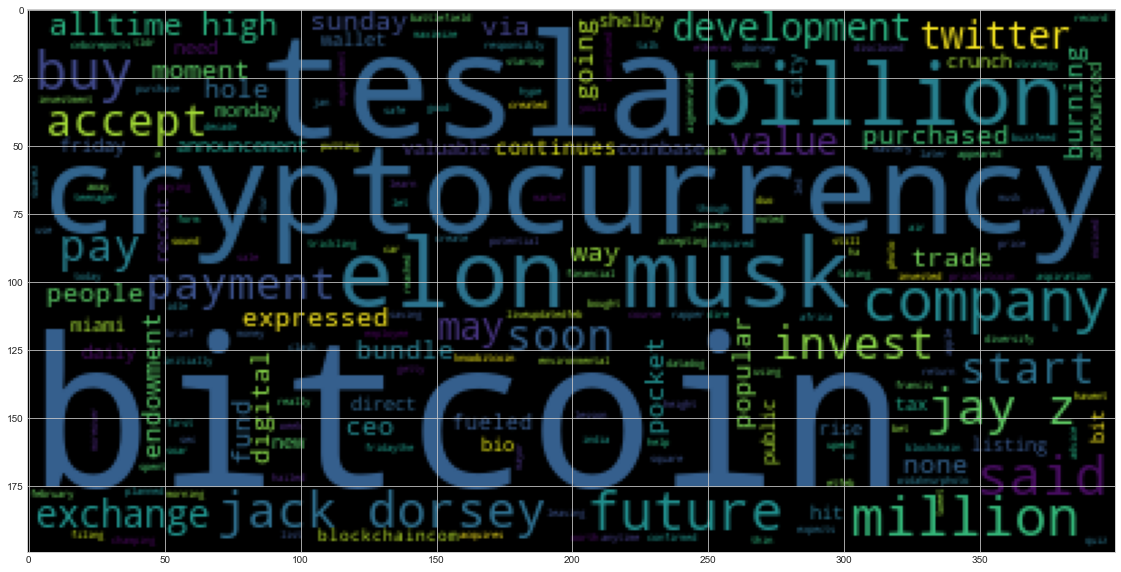

In [24]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(btc_all)
plt.imshow(wc)

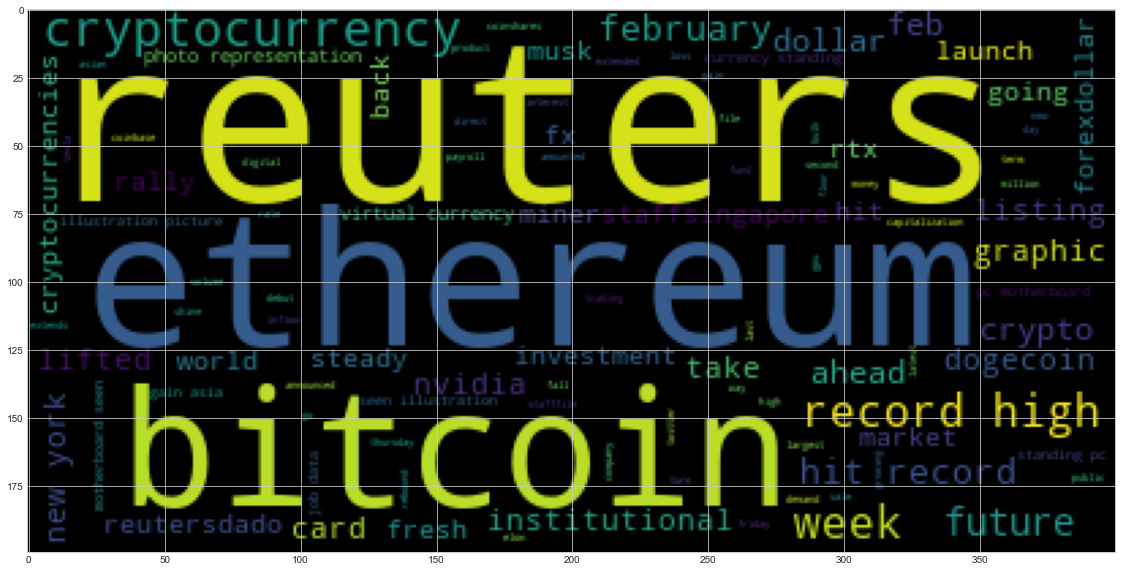

In [25]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(eth_all)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [29]:
# Concatenate all of the bitcoin text together
btc_all

'tesla buy bitcoin soon accept payment elon musk cryptocurrency hype idle talk cnbcreports tesla bought billion worth bitcoin help diversify maximize return start taking pay tesla billion bitcoin purchase clash environmental aspiration tesla led elon musk confirmed purchased billion bitcoin january expects start accepting payment future photo artur widaknurphoto via getty would trade bitcoin tesla brief moment sunday tesla said invested billion bitcoin planned let people use cryptocurrency pay car bitcoins price could expressed jack dorsey jay z invest million fund bitcoin development twitter square ceo jack dorsey rapper jay z created endowment fund bitcoin development initially africa india dorsey said fridaythe duo putting bitcoin tesla buy b bitcoin may accept cryptocurrency payment future today sec filing tesla disclosed acquired billion bitcoin popular cryptocurrency moreover company noted may also accept bitcoin future form cryptocurrency really burning hole pocket bitcoin first

In [30]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_all)

# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin News 🚀🚀🚀"

In [31]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [32]:
# List all Entities
btc_doc.ents

(billion,
 billion,
 sunday,
 billion,
 jack,
 million,
 india,
 today,
 billion,
 first,
 money decade later,
 monday,
 daily,
 jack,
 daily,
 recent week,
 friday,
 friday,
 sunday,
 tuesday,
 million,
 monday,
 evening,
 seventh,
 million,
 million)

---

## Ethereum NER

In [33]:
# Concatenate all of the ethereum text together
eth_all

'nvidia limit rtx crypto speed introduces mining card worried geforce rtx sold cryptocurrency miner snap every gpu sight nvidia think simple way help make new card unattractive crypto crowd coinbase going public via direct listing coinbase plan go public way direct listing company announced blog post todaythe cryptocurrency exchange founded allows user buy trade decentralized ethereum scale record peak future launch reuters file photo representation ethereum virtual currency standing pc motherboard seen illustration picture february reutersdado ruvicillustrationtokyo reuters e cryptocurrency ethereum hit record high ahead cme future launch reuters canada reuters stafffile photo representation ethereum virtual currency standing pc motherboard seen illustration picture february reutersdado ruvicillustrationfi remastered nyan cat art sell equivalent k first christie auction digital artwork backed nft nonfungible token still day away one notable sale world already taken place chris torres 

In [34]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_all)

# Add a title to the document
eth_doc.user_data["title"] = "Gwei News 🚀🚀🚀"

In [35]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [36]:
# List all Entities
eth_doc.ents

(first,
 next week,
 tuesday,
 second,
 thursday,
 second,
 thursday,
 weekly,
 week,
 previous week,
 ended week,
 friday,
 flow latest week,
 million,
 last week,
 india,
 saturday,
 twomonth,
 trillion day,
 flow latest week,
 million,
 last week,
 friday,
 monday)